###### Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

    оценка 2 и ниже — низкий рейтинг;
    оценка 4 и ниже — средний рейтинг;
    оценка 4.5 и 5 — высокий рейтинг.

Результат классификации запишите в столбец class.

In [138]:
# Вараиант 1 без группировки

import pandas as pd

def film_classification (row):
    answer = 'средний рейтинг'
    if row['rating'] <= 2.0:
        answer = 'низкий рейтинг'
    elif row['rating'] >= 4.5:
        answer = 'высокий рейтинг'
    return answer

ratings = pd.read_csv('ratings.csv')

ratings['class'] = ratings.apply(film_classification, axis=1)
ratings.head()



,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


In [139]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [140]:
# Вараиант 2 с группировкой

import pandas as pd
import tabulate 

def film_classification (row):
    answer = 'средний рейтинг'
    # присвоить рейтинг
    if row['rating'] <= 2.0:
        answer ='низкий рейтинг'
    elif row['rating'] >= 4.5:
        answer ='высокий рейтинг'
    return answer

ratings = pd.read_csv('ratings.csv')

# Посчитать среднее по оценкам пользователей и вывести во вспомогательный датафрейм
df = ratings[['movieId', 'rating']].groupby('movieId').mean()

# Добавить поле сlass
df['class'] = df.apply(film_classification, axis=1)

# Вывести всё с сортировкой по оценке
df.sort_values('rating', ascending=False)


,rating,class
movieId,,
163949,5.0,высокий рейтинг
71180,5.0,высокий рейтинг
51471,5.0,высокий рейтинг
52617,5.0,высокий рейтинг
53887,5.0,высокий рейтинг
...,...,...
5356,0.5,низкий рейтинг
46574,0.5,низкий рейтинг
4753,0.5,низкий рейтинг


In [141]:
# Вывести 20 фильмов  с сортировкой по ID
df.sort_values('movieId', ascending=True).head(20)

,rating,class
movieId,,
1,3.872470,средний рейтинг
2,3.401869,средний рейтинг
3,3.161017,средний рейтинг
4,2.384615,средний рейтинг
5,3.267857,средний рейтинг
6,3.884615,средний рейтинг
7,3.283019,средний рейтинг
8,3.800000,средний рейтинг
9,3.150000,средний рейтинг


In [142]:
# Сколько фильмов с какими рейтингами 
df.groupby('class').count()

,rating
class,
высокий рейтинг,668
низкий рейтинг,973
средний рейтинг,7425


In [143]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


###### Задание 2
Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

12345
'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.


###### Задание 3 (бонусное)

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

    В переменную years запишите список из всех годов с 1950 по 2010 года.

    Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:
        для каждой строки пройдите по всем годам списка years;
        если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
        если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.

    Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

    Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.


In [184]:
# В переменную years_list запишите загоовку списка из всех годов с 1950 по 2010 года
years_lst=[x for x in range(1950, 2011,1)] 
print (years_lst)
# Подключаем данные
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')


[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


In [145]:
# Смотрим что внутри:
df_movies.info()
df_movies.head()
print('\n')
df_ratings.head()
df_movies.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB




,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:
    для каждой строки пройдите по всем годам списка years;
    если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;
    если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.

In [186]:
%%time
def production_year (row, years_list):
    for year in years_list:
        if row['title'].find(str(year)) != -1:
            return year # год в названии найден
    year = 1900    
    return year

# Добавить поле year, передав список дат как параметр
df_movies['year'] = df_movies.apply(production_year, years_list=years_lst, axis=1)
df_movies

Wall time: 9.19 s


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900
9123,164977,The Gay Desperado (1936),Comedy,1900


In [188]:
%%time
# Вариант с готовым списком внути функции чуть медленнее:

def production_year (row):
   
    years_list = [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 
                  1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
                  1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
                  1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 
                  2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
                
    for year in years_list:
        if row['title'].find(str(year)) != -1:
            return year # год в названии найден
    year = 1900    
    return year

# Добавить поле year, передав список годов как параметр

df_movies['year'] = df_movies.apply(production_year,  axis=1)
df_movies

Wall time: 9.26 s


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900
9123,164977,The Gay Desperado (1936),Comedy,1900


In [189]:
# Проверить есть ли фильмы  не входяшие в диапазон
df_movies.loc[df_movies.year == 1900]


,movieId,title,genres,year
526,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical,1900
528,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,1900
623,746,Force of Evil (1948),Film-Noir,1900
718,897,For Whom the Bell Tolls (1943),Adventure|Drama|Romance|War,1900
719,898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,1900
...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900
9123,164977,The Gay Desperado (1936),Comedy,1900


In [190]:
# Распределение фильмов по годам выпуска 
df_movies.groupby('year').count()


,movieId,title,genres
year,,,
1900,1610,1610,1610
1950,27,27,27
1951,23,23,23
1952,27,27,27
1953,36,36,36
...,...,...,...
2006,261,261,261
2007,256,256,256
2008,247,247,247


In [191]:
# Исключить фильмы вне дипазона анализа
print('Было фильмов:')
df_movies.info()
print('\n')
df_movies = df_movies[df_movies.year != 1900]
print('Стало фильмов:\n')
df_movies.info()

Было фильмов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
 3   year     9125 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 285.3+ KB


Стало фильмов:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 0 to 9117
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  7515 non-null   int64 
 1   title    7515 non-null   object
 2   genres   7515 non-null   object
 3   year     7515 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 293.6+ KB


In [193]:
# Объединим датафреймы в общий фрейм:
df_all = pd.merge(df_movies, df_ratings) 
df_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93079 entries, 0 to 93078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    93079 non-null  int64  
 1   title      93079 non-null  object 
 2   genres     93079 non-null  object 
 3   year       93079 non-null  int64  
 4   userId     93079 non-null  int64  
 5   rating     93079 non-null  float64
 6   timestamp  93079 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.7+ MB


###### Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [181]:
# Сделаем маленькую результирующую табличку
df_result=df_all[['year','rating']].groupby('year').mean().sort_values('year', ascending=True)
df_result.info()
print(df_result.to_markdown())

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1950 to 2010
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  61 non-null     float64
dtypes: float64(1)
memory usage: 976.0+ bytes
|   year |   rating |
|-------:|---------:|
|   1950 |  3.91525 |
|   1951 |  3.98354 |
|   1952 |  4       |
|   1953 |  3.75459 |
|   1954 |  3.99422 |
|   1955 |  3.75172 |
|   1956 |  3.61765 |
|   1957 |  4.01424 |
|   1958 |  3.82317 |
|   1959 |  3.84103 |
|   1960 |  3.80921 |
|   1961 |  3.66385 |
|   1962 |  3.95245 |
|   1963 |  3.70597 |
|   1964 |  3.84149 |
|   1965 |  3.67871 |
|   1966 |  3.73673 |
|   1967 |  3.81452 |
|   1968 |  3.73784 |
|   1969 |  3.81738 |
|   1970 |  3.7     |
|   1971 |  3.74883 |
|   1972 |  4.01114 |
|   1973 |  3.80667 |
|   1974 |  3.9787  |
|   1975 |  3.82308 |
|   1976 |  3.80679 |
|   1977 |  3.90579 |
|   1978 |  3.549   |
|   1979 |  3.77797 |
|   1980 |  3.70882 |
|   1981 |  3.7

Гипотеза скорее достоверна, но нужна какая-то статистическая метрика или график.
Построим график

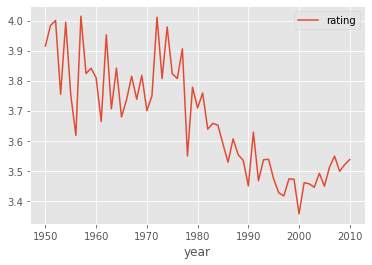

In [194]:
import matplotlib.pyplot as plt
df_result.plot()

plt.show()

###### Гипотеза подтверждается. 
С ростом года выпуска фильма его средний рейтинг снижается.
Очень жаль, что нет данных по последим 10 годам.

Для подтверждения  гипотезы воспользуемся альтернативным источником данных
из обсуждения 
https://habr.com/ru/post/318330/
Датасет размещен по ссылке 
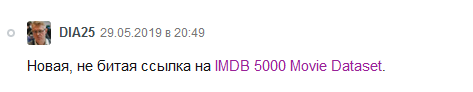
https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
df_movies = pd.read_csv('movie_metadata.csv')
df_movies.info()
df_movies.head()
min_year=int(df_movies.title_year.min())
maх_year=int(df_movies.title_year.max())
print(f'\n Данные по фильмам с {min_year} по {maх_year} год из базы IMDB')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

###### Сравним данные с нашим набором во временном интервале с 1950 по 2016 годы

|   title_year |   imdb_score |
|-------------:|-------------:|
|         1950 |      7       |
|         1951 |      7.4     |
|         1952 |      7.575   |
|         1953 |      7.1     |
|         1954 |      7.58    |
|         1955 |      7.65    |
|         1956 |      6.8     |
|         1957 |      8.55    |
|         1958 |      8.1     |
|         1959 |      7.36667 |
|         1960 |      8.23333 |
|         1961 |      7.72    |
|         1962 |      7.4375  |
|         1963 |      7.35    |
|         1964 |      7.78    |
|         1965 |      7.475   |
|         1966 |      7.33333 |
|         1967 |      7.075   |
|         1968 |      7.37273 |
|         1969 |      6.82    |
|         1970 |      7.125   |
|         1971 |      7.06364 |
|         1972 |      7.36667 |
|         1973 |      7.31111 |
|         1974 |      7.54444 |
|         1975 |      7.73333 |
|         1976 |      7.39    |
|         1977 |      6.83125 |
|         1978 |      6.9625  |
|       

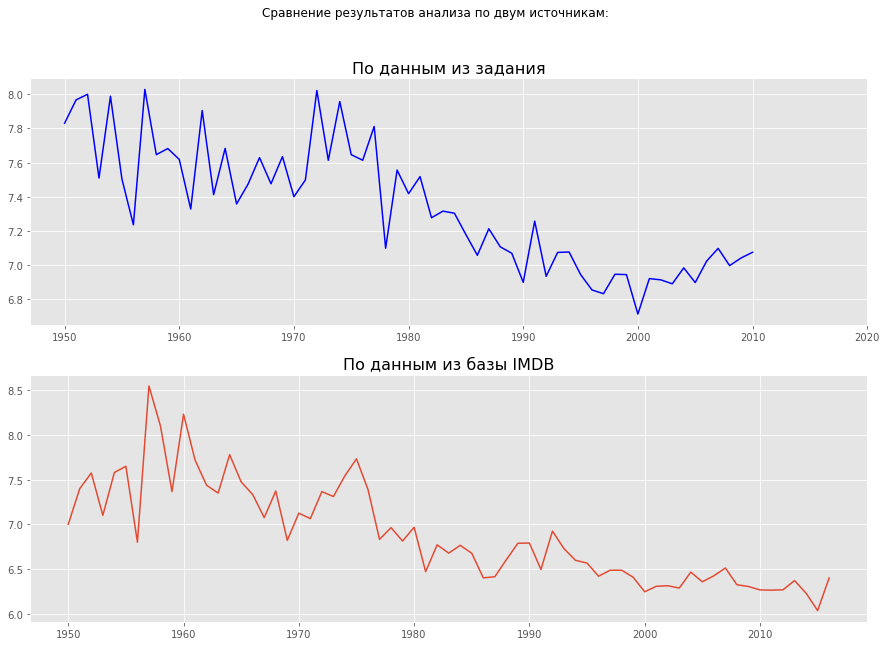

In [226]:
# Выбрать фильмы с годом выпуска с 1950 по всё что есть
df_movies = df_movies.loc[(df_movies['title_year'] >= 1950.0)]

# Распределение фильмов по годам выпуска в уменьшеной таблице
df_result_IMDB=df_movies[['title_year','imdb_score']].groupby('title_year').mean().sort_values('title_year', ascending=True)
print(df_result_IMDB.to_markdown())

# Построим два графика в одном окне

fig, axs = plt.subplots(nrows= 2 , ncols= 1, figsize=(15,10) )
fig.suptitle('Сравнение результатов анализа по двум источникам:')

axs[0].set_title("По данным из задания")
# По умолчанию получается плохо. Сделаем нстройкку сами и пересчитаем шкалу.
axs[0].plot(np.arange(1950, 2011, 1), df_result.rating*2.0, color='blue')
# Настроим подписи меток
axs[0].set_xticks(np.arange(1950, 2030, 10))

axs[1].set_title("По данным из базы IMDB")
axs[1].plot(df_result_IMDB)

plt.show()
